In [2]:
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt

import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

In [3]:
print("InsightFace version:", insightface.__version__)
# Initialize the FaceAnalysis app

InsightFace version: 0.7.3


# step 1- Detecting the faces

In [4]:
app = FaceAnalysis(name='buffalo_l')

download_path: /Users/boonsai/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [00:05<00:00, 48936.24KB/s]
/Users/boonsai/Desktop/Projects/face_swap/venv/lib/python3.10/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:121: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CoreMLExecutionProvider, AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/boonsai/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/boonsai/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/boonsai/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/boonsai/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/boonsai/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

ctx_id=0 means using CPU. If you have a GPU, use ctx_id=0 (for GPU 0), ctx_id=1 (for GPU 1), etc.

det_size=(640, 640) sets the detection resolution (adjust based on your needs).

In [8]:
app.prepare(ctx_id=0, det_size=(640, 640))

set det-size: (640, 640)


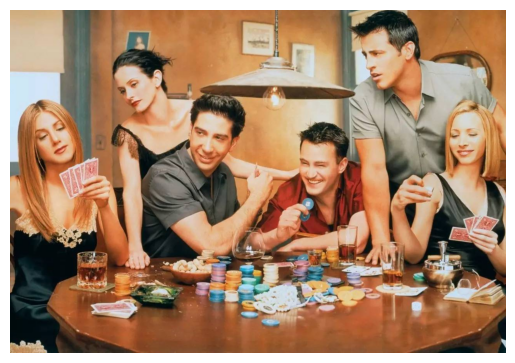

In [9]:
img = ins_get_image('t1')
plt.imshow(img[:, :, ::-1])
plt.axis('off')
plt.show()

In [10]:
faces = app.get(img)

In [11]:
faces

[{'bbox': array([466.0821 , 268.6164 , 573.58923, 415.5331 ], dtype=float32),
  'kps': array([[491.85046, 321.8314 ],
         [541.85266, 332.11188],
         [507.67114, 366.41312],
         [485.91965, 369.691  ],
         [533.74945, 378.3811 ]], dtype=float32),
  'det_score': np.float32(0.9196533),
  'landmark_3d_68': array([[ 4.6944370e+02,  2.9698944e+02,  7.5722778e+01],
         [ 4.6813416e+02,  3.1271912e+02,  7.9219711e+01],
         [ 4.6674796e+02,  3.2896017e+02,  8.1507698e+01],
         [ 4.6605328e+02,  3.4532599e+02,  8.0922768e+01],
         [ 4.6692227e+02,  3.6251474e+02,  7.3334045e+01],
         [ 4.7100314e+02,  3.7718729e+02,  6.5856659e+01],
         [ 4.7596683e+02,  3.9025583e+02,  5.8192699e+01],
         [ 4.8284662e+02,  4.0326260e+02,  4.7107635e+01],
         [ 4.9796429e+02,  4.1465970e+02,  4.2562874e+01],
         [ 5.1666071e+02,  4.1299536e+02,  4.6776680e+01],
         [ 5.3089258e+02,  4.0368939e+02,  5.6901142e+01],
         [ 5.4308667e+02,  3

In [12]:
len(faces)

6

In [13]:
faces[0].keys()

dict_keys(['bbox', 'kps', 'det_score', 'landmark_3d_68', 'pose', 'landmark_2d_106', 'gender', 'age', 'embedding'])

## crop and plot faces

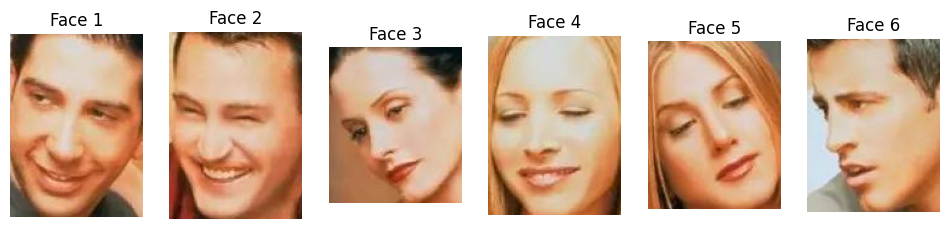

In [34]:
img = ins_get_image('t1')
fig, ax = plt.subplots(1, len(faces), figsize=(12, 5))

for i, face in enumerate(faces):
    bbox = face['bbox']
    bbox = [int(b) for b in bbox]
    ax[i].imshow(img[bbox[1]:bbox[3], bbox[0]:bbox[2], ::-1])
    ax[i].axis('off')
    ax[i].set_title(f"Face {i+1}", fontsize=12)

# Face Swapping

In [52]:
swapper = insightface.model_zoo.get_model('inswapper_128.onnx', download=False, download_zip=False)

/Users/boonsai/Desktop/Projects/face_swap/venv/lib/python3.10/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:121: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CoreMLExecutionProvider, AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


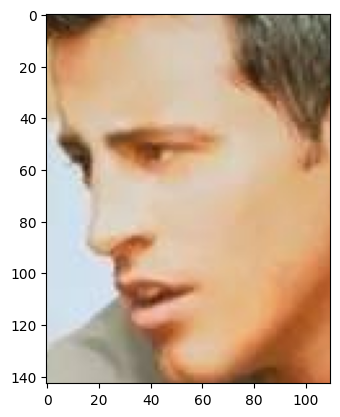

In [29]:
source_face = faces[5]
bbox = source_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(img[bbox[1]:bbox[3], bbox[0]:bbox[2], ::-1])
plt.show()

In [30]:
res = img.copy()
for face in faces:
    res = swapper.get(res, face, source_face, paste_back=True)

## plot the swapped faces

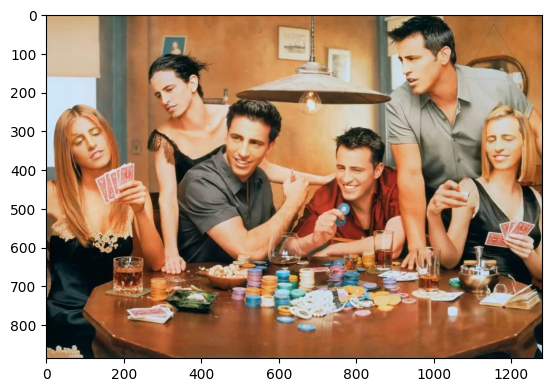

In [31]:
plt.imshow(res[:, :, ::-1])
plt.show()

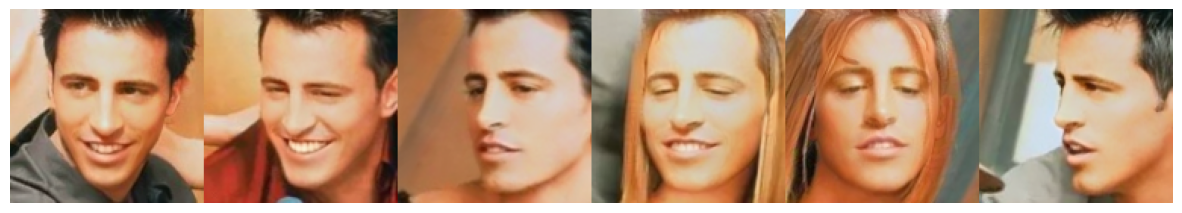

In [32]:
res = []
for face in faces:
    _img, _ = swapper.get(img, face, source_face, paste_back=False)
    res.append(_img)
res = np.concatenate(res, axis=1)
fig, ax = plt.subplots(figsize=(15, 5))
ax.imshow(res[:, :, ::-1])
ax.axis('off')
plt.show()